# Attribute Information
- MedInc median income in block

- HouseAge median house age in block

- AveRooms average number of rooms

- AveBedrms average number of bedrooms

- Population block population

- AveOccup average house occupancy

- Latitude house block latitude

- Longitude house block longitude

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('DATA/california_housing_sklearn.csv')

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   SalePrice   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
SalePrice     0
dtype: int64

In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


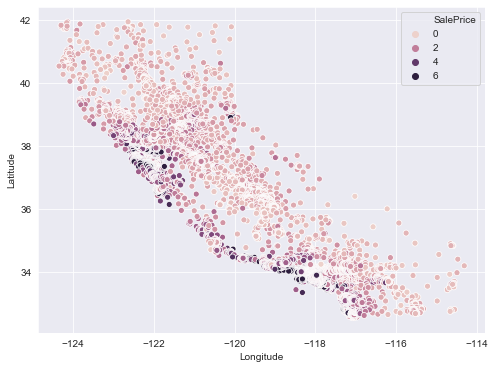

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='SalePrice')

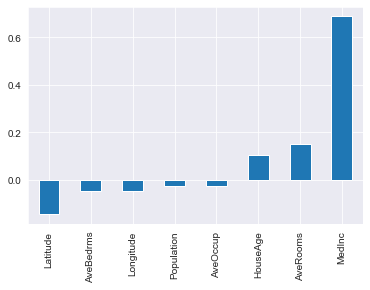

In [8]:
df.corr()['SalePrice'].sort_values().drop('SalePrice').plot(kind='bar')

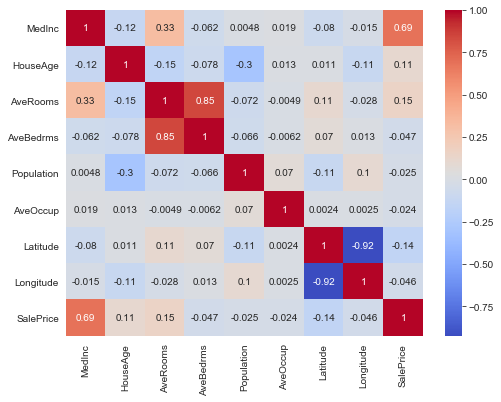

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(['SalePrice'], axis=1)

In [12]:
y = df['SalePrice']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Machine Learning Model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [15]:
ml_model = LinearRegression()

In [16]:
ml_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
ml_pred = ml_model.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
print(mean_squared_error(y_test, ml_pred))

0.5560774769195405


Text(0, 0.5, 'Predictions')

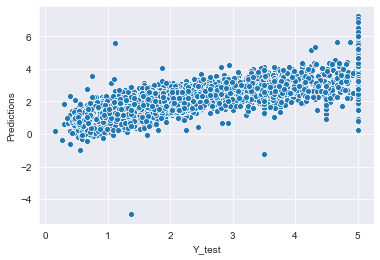

In [24]:
#Linear Regression model predictions plot
sns.scatterplot(y_test, ml_pred)
plt.xlabel('Y_test')
plt.ylabel('Predictions')

In [40]:
scores = []
for estimator in range(1,100):
    rf_model = RandomForestRegressor(n_estimators=estimator)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    score = mean_squared_error(y_test, rf_pred)
    scores.append(score)

Text(0, 0.5, 'Error Rate')

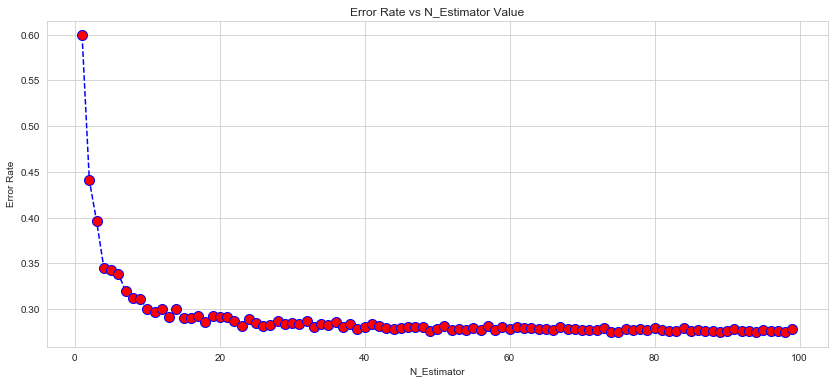

In [43]:
#Best n_estimator number plot
sns.set_style('whitegrid')
plt.figure(figsize=(14,6))
plt.plot(range(1,100),scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10,)
plt.title('Error Rate vs N_Estimator Value')
plt.xlabel('N_Estimator')
plt.ylabel('Error Rate')

In [44]:
rf_model = RandomForestRegressor(n_estimators=18)

In [45]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=18, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
rf_pred = rf_model.predict(X_test)

In [47]:
print(mean_squared_error(y_test, rf_pred))

0.2945913851408147


Text(0, 0.5, 'Predictions')

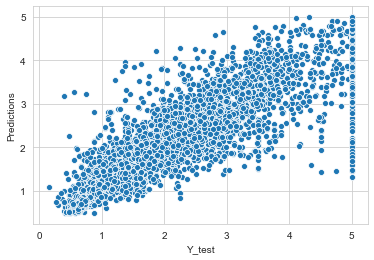

In [48]:
#Random Forest Regression model Predictions plot
sns.scatterplot(y_test, rf_pred)
plt.xlabel('Y_test')
plt.ylabel('Predictions')

# Deep Learning Model

In [49]:
from sklearn.preprocessing import StandardScaler

In [55]:
#convert pandas Data Frame to numpy array
X_train= X_train.values
X_test = X_test.values

In [56]:
y_train = y_train.values
y_test = y_test.values

In [54]:
scaler = StandardScaler()

In [57]:
X_train = scaler.fit_transform(X_train)

In [58]:
X_test = scaler.transform(X_test)

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=20)

In [62]:
X_train.shape

(15480, 8)

In [65]:
tf_model = Sequential()
tf_model.add(Input(shape=8)) #input layer

tf_model.add(Dense(units=8, activation='relu')) #hidden layer
tf_model.add(Dropout(rate=0.2))

tf_model.add(Dense(units=4, activation='relu')) #hidden layer
tf_model.add(Dropout(rate=0.2))

tf_model.add(Dense(units=1)) #otput layer layer

tf_model.compile(optimizer='adam', loss='mse')

In [66]:
tf_model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks = [early_stop], epochs = 500)

Train on 15480 samples, validate on 5160 samples
Epoch 1/500
15480/15480 [==============================] - 2s 146us/sample - loss: 3.5077 - val_loss: 1.0547
Epoch 2/500
15480/15480 [==============================] - 1s 70us/sample - loss: 1.2360 - val_loss: 0.7551
Epoch 3/500
15480/15480 [==============================] - 1s 70us/sample - loss: 1.0093 - val_loss: 0.6135
Epoch 4/500
15480/15480 [==============================] - 1s 71us/sample - loss: 0.8747 - val_loss: 0.6148
Epoch 5/500
15480/15480 [==============================] - 1s 71us/sample - loss: 0.8225 - val_loss: 0.5646
Epoch 6/500
15480/15480 [==============================] - 1s 72us/sample - loss: 0.7527 - val_loss: 0.5314
Epoch 7/500
15480/15480 [==============================] - 1s 71us/sample - loss: 0.6947 - val_loss: 0.4878
Epoch 8/500
15480/15480 [==============================] - 1s 72us/sample - loss: 0.6660 - val_loss: 0.4813
Epoch 9/500
15480/15480 [==============================] - 1s 72us/sample - loss: 0.63

Epoch 76/500
15480/15480 [==============================] - 1s 76us/sample - loss: 0.5155 - val_loss: 0.4021
Epoch 77/500
15480/15480 [==============================] - 1s 75us/sample - loss: 0.5188 - val_loss: 0.4102
Epoch 78/500
15480/15480 [==============================] - 1s 74us/sample - loss: 0.5033 - val_loss: 0.3982
Epoch 79/500
15480/15480 [==============================] - 1s 73us/sample - loss: 0.5122 - val_loss: 0.4023
Epoch 80/500
15480/15480 [==============================] - 1s 74us/sample - loss: 0.5162 - val_loss: 0.4021
Epoch 81/500
15480/15480 [==============================] - 1s 76us/sample - loss: 0.5063 - val_loss: 0.4054
Epoch 82/500
15480/15480 [==============================] - 1s 75us/sample - loss: 0.5084 - val_loss: 0.4019
Epoch 83/500
15480/15480 [==============================] - 1s 76us/sample - loss: 0.5110 - val_loss: 0.4039
Epoch 84/500
15480/15480 [==============================] - 1s 76us/sample - loss: 0.5115 - val_loss: 0.4036
Epoch 85/500
15480/

In [67]:
tf_model_loss = pd.DataFrame(tf_model.history.history)

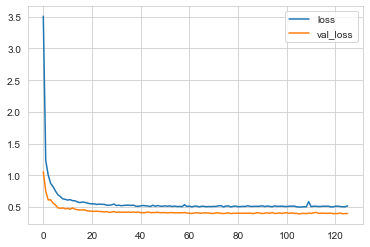

In [68]:
tf_model_loss.plot()

In [69]:
tf_pred=tf_model.predict(X_test)

In [70]:
print(mean_squared_error(y_test, tf_pred))

0.39949731247005976


In [74]:
tf_pred.shape

(5160, 1)

In [89]:
tf_pred = tf_pred.reshape(5160,)

In [91]:
tf_pred

array([3.359605 , 5.2458897, 1.3324316, ..., 1.738939 , 1.1078193,
       2.581953 ], dtype=float32)

In [93]:
y_test = y_test.reshape(5160,)

In [94]:
y_test.shape

(5160,)

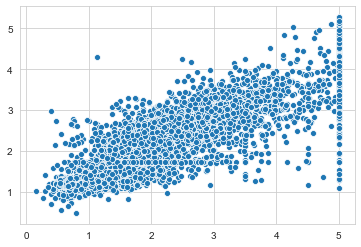

In [95]:
sns.scatterplot(y_test, tf_pred)
plt.title()

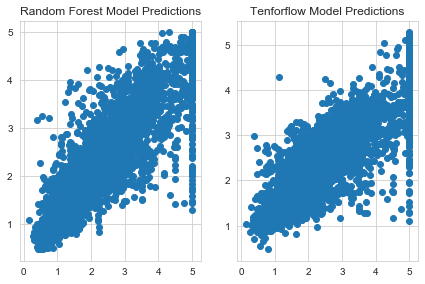

In [141]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(y_test, rf_pred)
ax1.set_title('Random Forest Model Predictions')
ax2.scatter(y_test, tf_pred)
ax2.set_title('Tenforflow Model Predictions')
plt.tight_layout(pad=0.9,h_pad=0.9, w_pad=0.9)